Iteration 0: J(w) = 0.6931471805599452
Iteration 100: J(w) = nan
Iteration 200: J(w) = nan
Iteration 300: J(w) = nan
Iteration 400: J(w) = nan
Iteration 500: J(w) = nan
Iteration 600: J(w) = nan
Iteration 700: J(w) = nan
Iteration 800: J(w) = nan
Iteration 900: J(w) = nan
Final weights: [2206.72945663]
Final cost: J(w) = nan


<ipython-input-2-1b238f586a7a>:30: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
<ipython-input-2-1b238f586a7a>:30: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


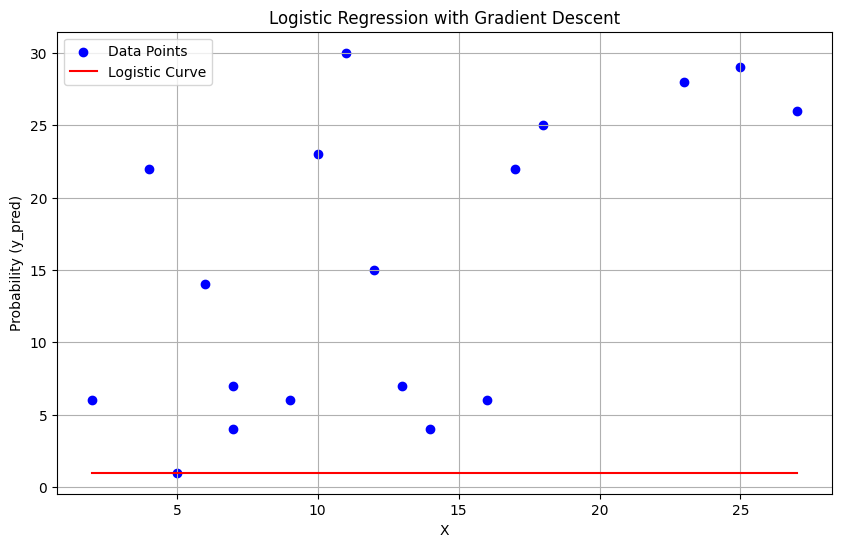

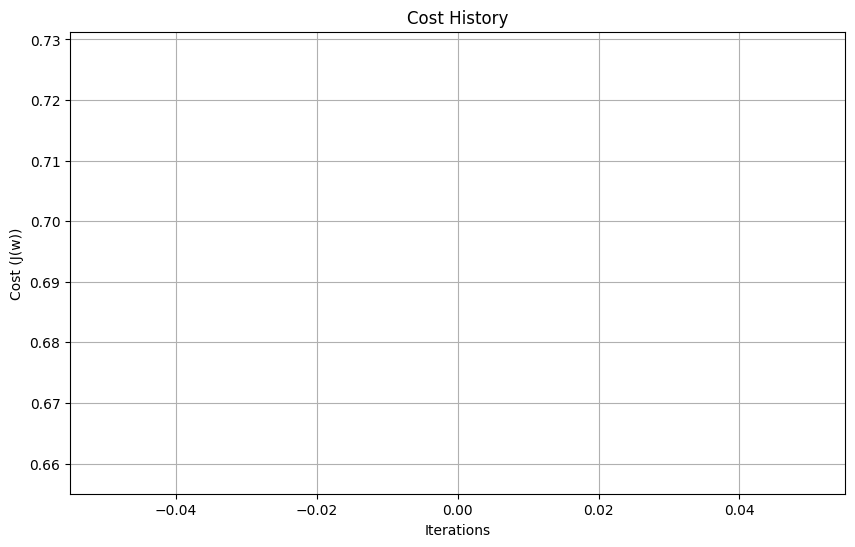

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from Excel file
file_path = '/content/SVM (1) (2).xlsx'
data = pd.read_excel(file_path)
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values  # Binary target variable (0 or 1)

# Step 2: Initialize model parameters
num_iterations = 1000
learning_rate = 0.01
m = len(y)
n = X.shape[1]  # Number of features
w = np.zeros(n)  # Initialize weights as zeros

# Lists to store cost for plotting
cost_history = []

# Step 3: Implement gradient descent
for iteration in range(num_iterations):
    # Calculate logits (z)
    z = np.dot(X, w)

    # Calculate the predicted probabilities using the logistic function
    y_pred = 1 / (1 + np.exp(-z))

    # Calculate the cost (J(w)) using the cross-entropy loss
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost_history.append(cost)

    # Calculate the gradient
    gradient = (1 / m) * np.dot(X.T, (y_pred - y))

    # Update weights using the gradient
    w -= learning_rate * gradient

    # Print cost for every 100 iterations
    if iteration % 100 == 0:
        print(f'Iteration {iteration}: J(w) = {cost}')

# Step 4: Print the final weights and cost
print(f'Final weights: {w}')
print(f'Final cost: J(w) = {cost}')

# Step 5: Plot the logistic curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue')

# Create a range of x values for the logistic curve
x_range = np.linspace(min(X), max(X), 100)
z_range = np.dot(x_range, w)
y_pred_range = 1 / (1 + np.exp(-z_range))

plt.plot(x_range, y_pred_range, label='Logistic Curve', color='red')
plt.xlabel('X')
plt.ylabel('Probability (y_pred)')
plt.title('Logistic Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Step 6: Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J(w))')
plt.title('Cost History')
plt.grid(True)

plt.show()